In [2]:
import glob

files = glob.glob(r"C:\Users\tarun\Downloads\*.csv")
print(files)


[]


In [3]:
import glob

files = glob.glob(r"C:\Users\tarun\Downloads\*.csv")
print(files)


[]


c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

🔹 AdaBoost Performance
✅ Accuracy  : 0.4771
✅ Precision : 0.5264
✅ Recall    : 0.4771
✅ F1 Score  : 0.4698
✅ MCC       : 0.4279

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.71      0.39        28
           1       0.00      0.00      0.00         6
           2       0.60      0.33      0.43         9
           3       0.29      0.38      0.33        13
           4       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         6
           6       0.33      0.28      0.30        18
           7       0.00      0.00      0.00         1
           8       0.52      0.54      0.53        26
           9       1.00      0.60      0.75         5
          10       0.59      0.45      0.51        29
          11       0.00      0.00      0.00         2
          12       1.00      0.20      0.33         5
          13       0.67      0.36      0.47        22
          14       0.00      0.00   

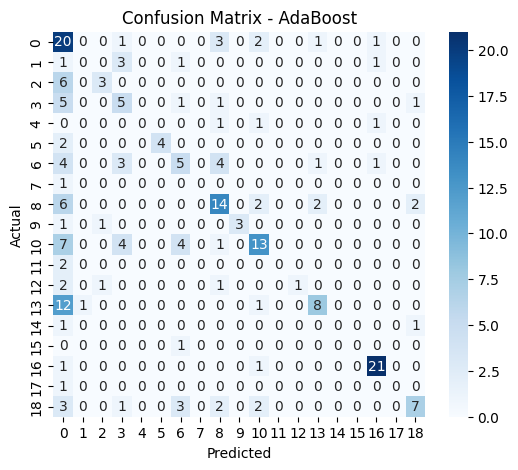

In [6]:
# ===========================================
# 📌 AdaBoost with Metrics (Handle Missing Data)
# ===========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, matthews_corrcoef, classification_report, confusion_matrix
)
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# =========================
# 1. Load Dataset
# =========================
df = pd.read_csv("matches.csv")   # same folder me hai to direct filename use karo

# Target column: "winner"
df = df.dropna(subset=["winner"])  # target column me NaN hatao
X = pd.get_dummies(df.drop(columns=["winner"]), drop_first=True)
y = df["winner"].astype("category").cat.codes

# =========================
# 2. Handle Missing Values
# =========================
imputer = SimpleImputer(strategy="most_frequent")  # missing ko most frequent se fill karo
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# =========================
# 3. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# 4. Train AdaBoost
# =========================
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
ada.fit(X_train, y_train)

# =========================
# 5. Predictions
# =========================
y_pred = ada.predict(X_test)

# =========================
# 6. Evaluation Metrics
# =========================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
mcc = matthews_corrcoef(y_test, y_pred)

print("🔹 AdaBoost Performance")
print(f"✅ Accuracy  : {accuracy:.4f}")
print(f"✅ Precision : {precision:.4f}")
print(f"✅ Recall    : {recall:.4f}")
print(f"✅ F1 Score  : {f1:.4f}")
print(f"✅ MCC       : {mcc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# =========================
# 7. Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


In [9]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
